In [9]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
sd = 2
random.seed(sd)
np.random.seed(sd)

In [10]:
class KMeans():
    def __init__(self, K, X=None, N=0):
        self.K = K
        if X == None:
            if N == 0:
                raise Exception("If no data is provided, \
                                 a parameter N (number of points) is needed")
            else:
                self.N = N
                self.X = self._init_board_gauss(N, K)
        else:
            self.X = X
            self.N = len(X)
        self.mu = None
        self.clusters = None
        self.method = None
 
    def _init_board_gauss(self, N, k):
        n = float(N)/k
        X = []
        for i in range(k):
            c = (random.uniform(-1,1), random.uniform(-1,1))
            s = random.uniform(0.05,0.15)
            x = []
            while len(x) < n:
                a,b = np.array([np.random.normal(c[0],s),np.random.normal(c[1],s)])
                # Continue drawing points from the distribution in the range [-1,1]
                if abs(a) and abs(b)<1:
                    x.append([a,b])
            X.extend(x)
        X = np.array(X)[:N]
        return X
 
    def plot_board(self):
        X = self.X
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        
        mew = 1
        if self.mu and self.clusters:
            mu = self.mu
            clus = self.clusters
            K = self.K
            for m, clu in clus.items():
                cs = plt.cm.spectral(1.*m/self.K)
                plt.plot(mu[m][0], mu[m][1], 'o', marker='*', \
                         markersize=12, color=cs, mew=mew)
                plt.plot(zip(*clus[m])[0], zip(*clus[m])[1], '.', \
                         markersize=8, color=cs, alpha=0.5)
        elif self.mu:
            mu = self.mu
            plt.plot(zip(*X)[0], zip(*X)[1], '.', alpha=0.5)
            for (m, ctr) in enumerate(self.mu):
                cs = plt.cm.spectral(1.*m/self.K)
                plt.plot(ctr[0], ctr[1], 'o', marker='*', \
                         markersize=12, color=cs, mew=mew)
        else:
            plt.plot(zip(*X)[0], zip(*X)[1], '.', alpha=0.5)
        if self.method == '++':
            tit = 'K-means++'
        else:
            tit = 'K-means with random initialization'
        pars = 'N=%s, K=%s' % (str(self.N), str(self.K))
        # plt.title('\n'.join([pars, tit]), fontsize=16)
        plt.show()
        plt.savefig('plots/kpp_N%s_K%s.png' % (str(self.N), str(self.K)), \
                    bbox_inches='tight', dpi=200)
        plt.close()
 
    def _cluster_points(self):
        mu = self.mu
        clusters  = {}
        for x in self.X:
            bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                             for i in enumerate(mu)], key=lambda t:t[1])[0]
            try:
                clusters[bestmukey].append(x)
            except KeyError:
                clusters[bestmukey] = [x]
        self.clusters = clusters
 
    def _reevaluate_centers(self):
        clusters = self.clusters
        newmu = []
        keys = sorted(self.clusters.keys())
        for k in keys:
            newmu.append(np.mean(clusters[k], axis = 0))
        self.mu = newmu
 
    def _has_converged(self):
        K = len(self.oldmu)
        return(set([tuple(a) for a in self.mu]) == \
               set([tuple(a) for a in self.oldmu])\
               and len(set([tuple(a) for a in self.mu])) == K)
 
    def find_centers(self, method='random'):
        self.method = method
        X = self.X
        K = self.K
        print 'Initial layout of points'
        self.plot_board()
        
        
        self.oldmu = random.sample(X, K)
        if method != '++':
            # Initialize to K random centers
            self.mu = random.sample(X, K)
            
        it = 1
        while not self._has_converged():
            print 'Iteration:', it
            it += 1
            
            print 'Step 1: Evaluate centers'
            self.oldmu = self.mu
            self.plot_board()
            
            print 'Step 2: Assign clusters'
            # Assign all points in X to clusters
            self._cluster_points()
            self.plot_board()
            # Reevaluate centers
            self._reevaluate_centers()

Initial layout of points


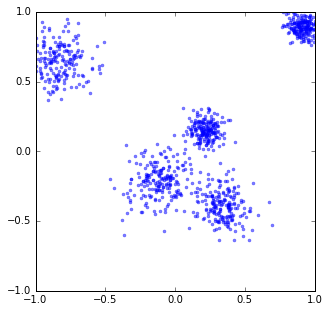

Iteration: 1
Step 1: Evaluate centers


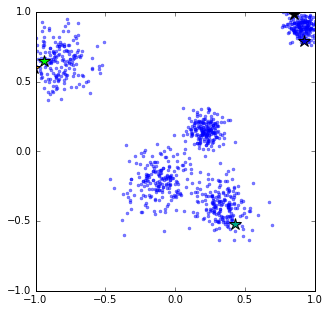

Step 2: Assign clusters


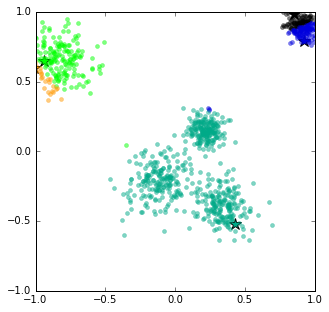

Iteration: 2
Step 1: Evaluate centers


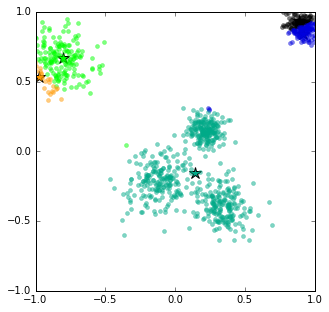

Step 2: Assign clusters


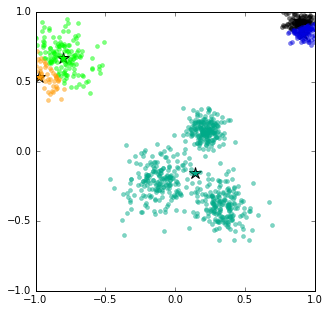

Iteration: 3
Step 1: Evaluate centers


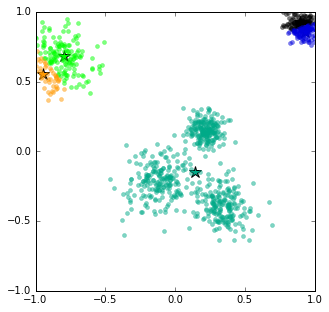

Step 2: Assign clusters


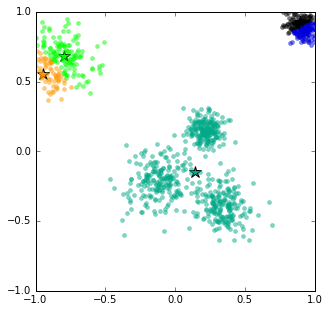

Iteration: 4
Step 1: Evaluate centers


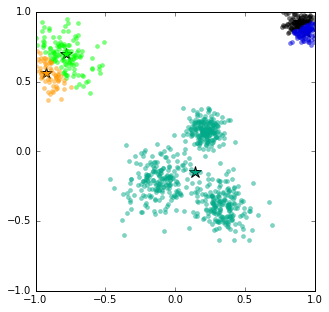

Step 2: Assign clusters


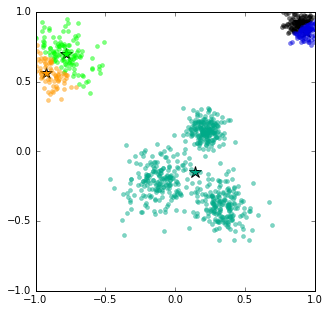

Iteration: 5
Step 1: Evaluate centers


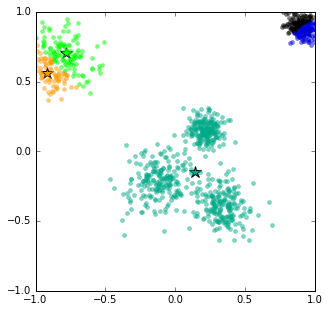

Step 2: Assign clusters


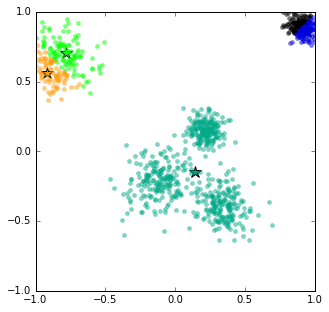

Iteration: 6
Step 1: Evaluate centers


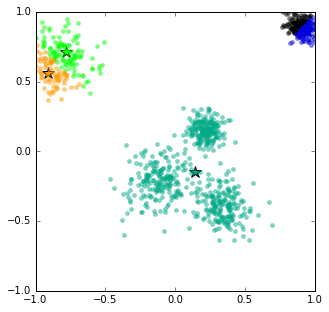

Step 2: Assign clusters


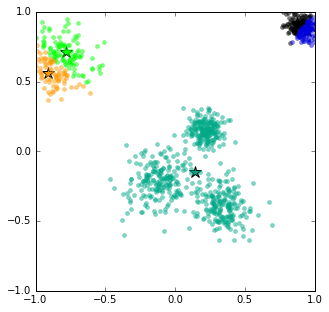

Iteration: 7
Step 1: Evaluate centers


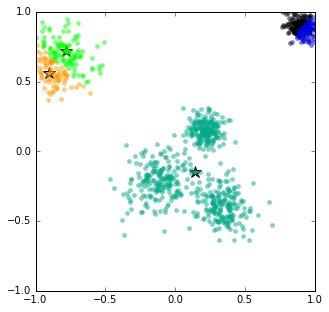

Step 2: Assign clusters


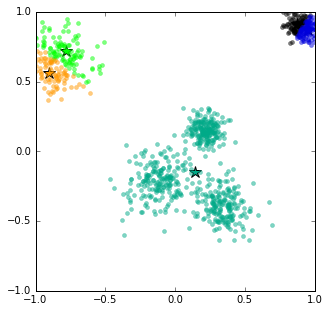

Iteration: 8
Step 1: Evaluate centers


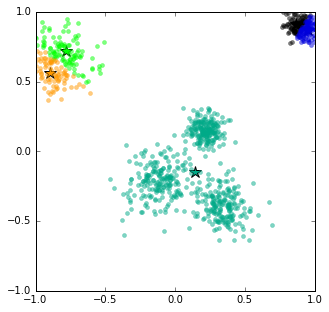

Step 2: Assign clusters


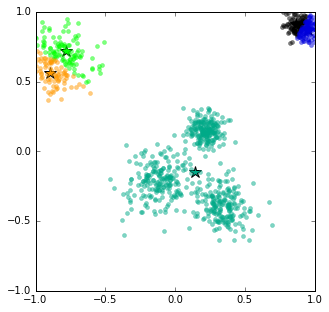

Iteration: 9
Step 1: Evaluate centers


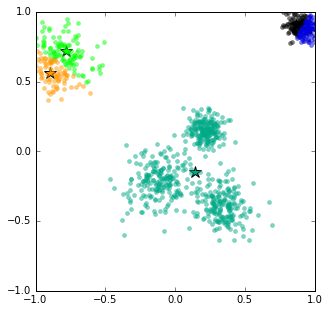

Step 2: Assign clusters


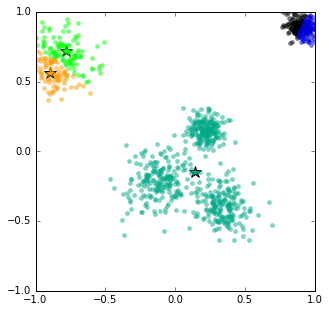

Iteration: 10
Step 1: Evaluate centers


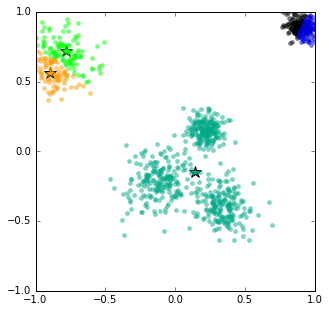

Step 2: Assign clusters


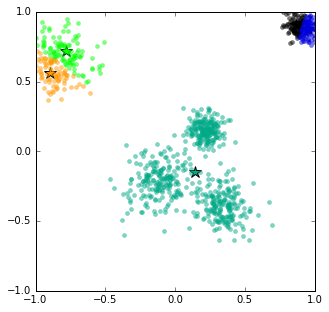

Iteration: 11
Step 1: Evaluate centers


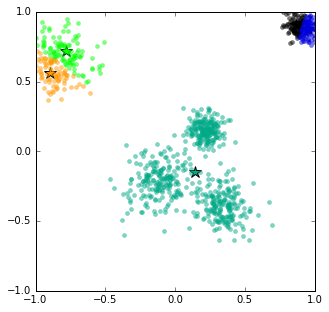

Step 2: Assign clusters


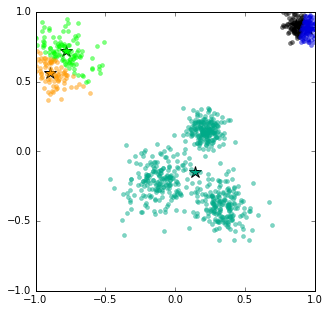

Iteration: 12
Step 1: Evaluate centers


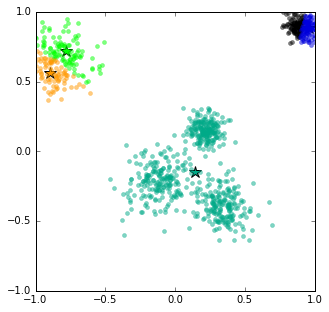

Step 2: Assign clusters


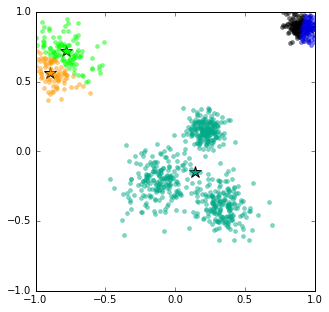

Iteration: 13
Step 1: Evaluate centers


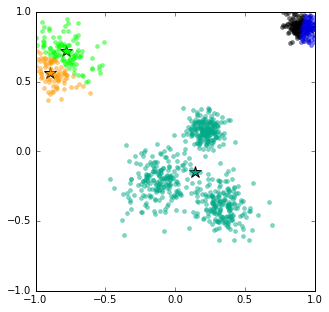

Step 2: Assign clusters


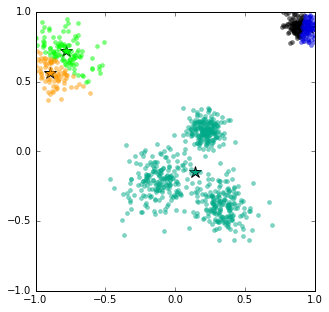

Iteration: 14
Step 1: Evaluate centers


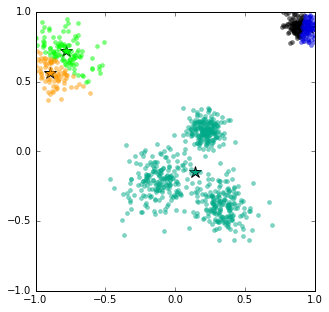

Step 2: Assign clusters


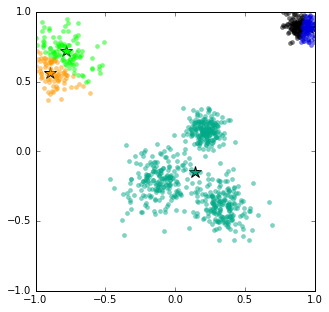

Iteration: 15
Step 1: Evaluate centers


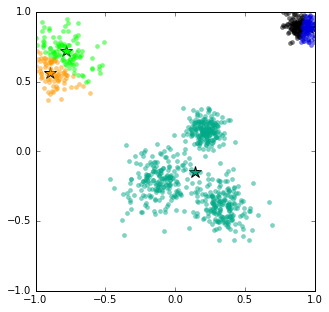

Step 2: Assign clusters


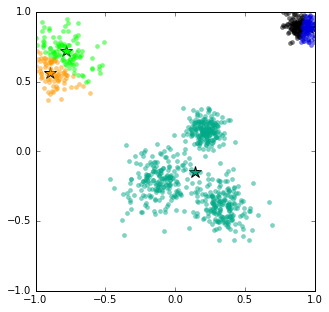

In [11]:
kmeans = KMeans(5, N=1000)
kmeans.find_centers()